---

In [446]:
from scipy.optimize import leastsq

In [447]:
def bg_func(l, b, coeff_l, coeff_b):
    l_poly = np.poly1d(coeff_l)
    b_poly = np.poly1d(coeff_b)
    return l_poly(l) * b_poly(b)

def fit_func(p, l, b, val, Kl, Kb):
    return bg_func(l, b, p[:Kl], p[Kl:Kl+Kb]) - val

In [448]:
x0_b = [3.1, 0, -2e-4, 0, 1e-8, 0, 0][::-1]
x0_l = [2.75, 0, -1e-4, 0, 3e-9, 0, 0][::-1]
x0 = np.concatenate((x0_l, x0_b))

_data_mask = (full_stack_masked != 0)
res, ier = leastsq(fit_func, x0=x0, 
                   args=(pix_l[_data_mask].wrap_at(180*u.deg).value, 
                         np.cos(pix_b[_data_mask]), 
                         np.log10(full_stack_masked[_data_mask]),
                         len(x0_l), len(x0_b)))

In [449]:
res, ier = res

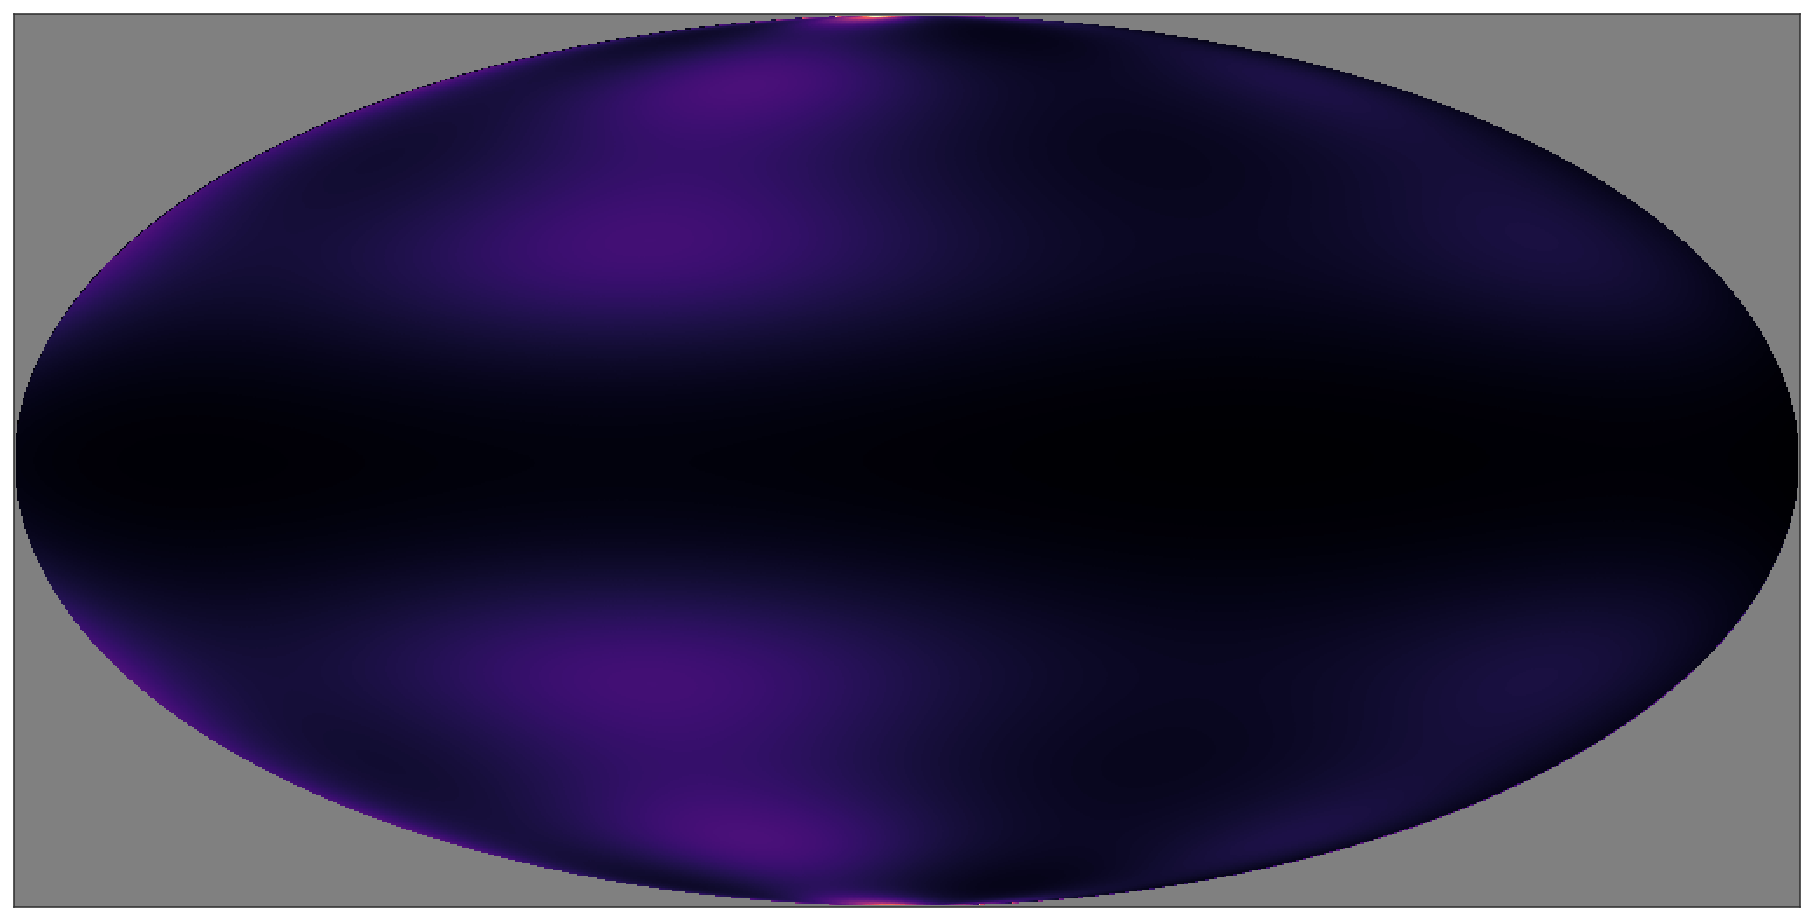

In [450]:
proj = hp.projector.MollweideProj(xsize=1024, 
                                  rot=[266.40498829, -28.93617776, 59.])
bg_model = 10 ** bg_func(pix_l.wrap_at(180*u.deg).value, 
                         np.cos(pix_b), 
                         res[:len(x0_l)], res[len(x0_l):])

img = proj.projmap(bg_model, func)

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.imshow(img, origin='bottom', extent=proj.get_extent())
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

In [350]:
# plt.figure(figsize=(10, 8))
# plt.plot(pix_b[(full_stack_masked != 0)].value, 
#          np.log10(full_stack_masked[(full_stack_masked != 0)]),
#          marker='o', mew=0, ls='none', ms=1.5, alpha=0.1)

# bbb = np.linspace(-90, 90, 128)
# plt.plot(bbb, np.poly1d(x0_b)(bbb))

# plt.figure(figsize=(10, 8))
# plt.plot(pix_l[(full_stack_masked != 0)].wrap_at(180*u.deg).value, 
#          np.log10(full_stack_masked[(full_stack_masked != 0)]),
#          marker='o', mew=0, ls='none', ms=1.5, alpha=0.1)

# bbb = np.linspace(-180, 180, 128)
# plt.plot(bbb, np.poly1d(x0_l)(bbb))

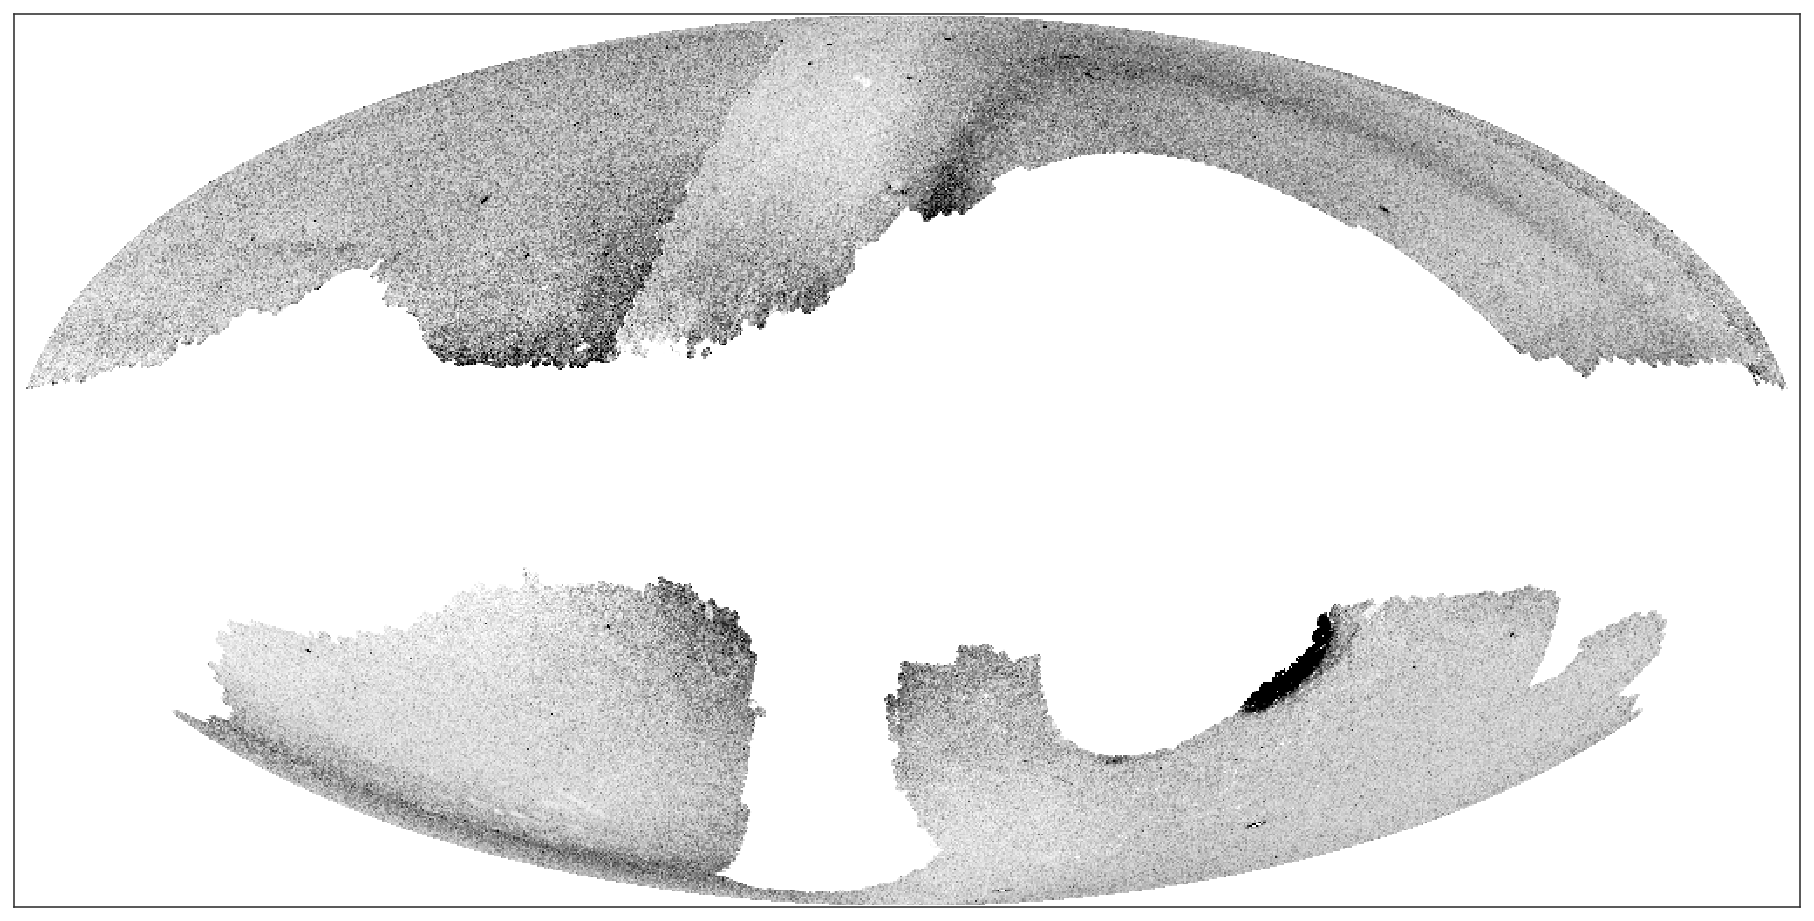

In [352]:
proj = hp.projector.MollweideProj(xsize=1024, 
                                  rot=[266.40498829, -28.93617776, 59.])
bg_model = 10 ** bg_func(pix_l.wrap_at(180*u.deg).value, np.cos(pix_b), #.value, 
                         res[0][:len(x0_l)], res[0][len(x0_l):])
# img = proj.projmap(bg_model, func)

diff = full_stack - bg_model
diff[full_stack == 0] = hp.UNSEEN
img = proj.projmap(diff, func)

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.imshow(img, origin='bottom', extent=proj.get_extent(), 
          vmin=-5, vmax=1e1, cmap='Greys')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

Construct a low-order reconstruction using spherical harmonics:

In [353]:
# meh, doesn't work!
# lmax = 4
# alm = hp.map2alm(full_stack_masked, lmax=lmax)
# bg = hp.alm2map(alm, nside=nside, lmax=lmax)

# img = proj.projmap(bg, func)
# fig, ax = plt.subplots(1, 1, figsize=(16, 16))
# ax.imshow(img, origin='bottom', extent=proj.get_extent())
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

# img = proj.projmap(full_stack - bg, func)
# fig, ax = plt.subplots(1, 1, figsize=(16, 16))
# ax.imshow(img, origin='bottom', extent=proj.get_extent(), vmin=0, vmax=1e4)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)